In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import time
from scipy.integrate import solve_ivp, solve_bvp
from scipy.optimize import brentq

# problem 1
idealized spring-mass systems have numerous applications throughout engineering. the figure below illustrates an arrangement of five plates interconnected in series by five springs and which is being depressed under a mass of 3000 kg. 

equlilibruim force balance: $k_2(x_2-x_1)=k_1x_1$

a) define the equations that specify the positions of all the plates at equilibrium.

$k_2(x_2-x_1)=k_1x_1$

$k_3(x_3-x_2)=k_2(x_2-x_1)$

$k_4(x_4-x_3)=k_3(x_3-x_2)$

$k_5(x_5-x_4)=k_4(x_4-x_3)$

$F=k_5(x_5-x_4)$

b) solve for the displacements of each plate if $k_1=150, k_2=50, k_3=75, k_4=225,  \ and \ k_5=100$

In [90]:
k1=150
k2=50
k3=75
k4=225
k5=100
F=(3000*9.81/1000)

# creating the matrix
# F = 100(x_5-x_4)
# 0 0 0 -100 100 
# 100(x_5-x_4) - 225(x_4-x_3) = 0
# 0 0 225 -325 100 
# 225(x_4-x_3) - 75(x_3-x_2) = 0
# 0 75 -300 225 0
# k3(x_3-x_2) - k2(x_2-x_1) = 0
# 50 -125 75 0 0 
# k2(x_2-x_1) - k1(x_1) = 0
# -200 50 0 0 0 

A=np.array([[0,0,0,-k5,k5],[0,0,k4,(-k4-k5),k5],\
    [0,k3,(-k4-k3),k4,0],[k2,(-k3-k2),k3,0,0],[(-k1-k2),k2,0,0,0]])
B=np.array([F,0,0,0,0])
xs=np.linalg.solve(A,B)
print(f'x1 = {xs[0]}m, x2 = {xs[1]}m, x3 = {xs[2]}m, x4 = {xs[3]}m,\
 x5 = {xs[4]}m.')


x1 = 0.19619999999999999m, x2 = 0.7847999999999999m, x3 = 1.1771999999999998m, x4 = 1.3079999999999998m, x5 = 1.6022999999999998m.


c) what is the corresponding absolute height of each plate?

In [85]:
unloaded=[2,4,6,8,10]
absh=[]

for i in range(len(unloaded)):
    absh.append(unloaded[i]-xs[i])
    
print(f'plates absolute heigh in m: {absh}')


plates absolute heigh in m: [1.8038, 3.2152000000000003, 4.8228, 6.692, 8.3977]


d) perform a sensitivity analysis by plotting the absolute height of each plate as a function of the applied mass for masses from 0 to 5000 kg (10kg increments)

e) 

f)

# problem 2
BVP

$T_0=1000$ lbs

set dy/dx = k

dk/dx = d^2(y)/dx^2 = (w0/T0)*(1+np.sin((np.pi*x)/(2*lB)))


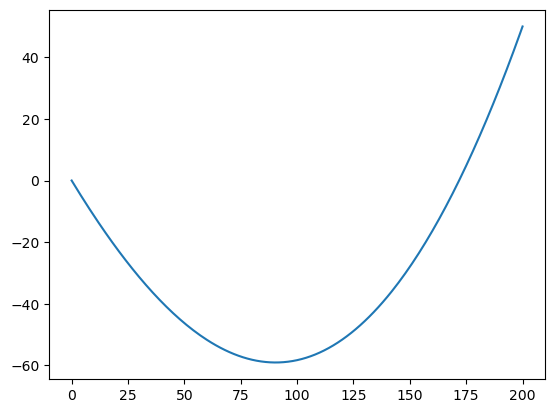

In [169]:
w0=10
T0=1000
lB=200
hB=50

def dydx(x,y,k):
    return k
def dkdx(x,y,k):  
    return (w0/T0)*(1+np.sin((np.pi*x)/(2*lB)))

def e(xi,xf,yi,ki,h):
    a=[(xi,yi,ki)]
    x=a[-1][0]
    y=a[-1][1]
    k=a[-1][2]
    X=[]
    Y=[]
    K=[]
    while x+h <= xf:
        y2 = y+h*dydx(x,y,k)
        k2 = k+h*dkdx(x,y,k) 
        a.append((x+h,y2,k2))
        x=a[-1][0]
        y=a[-1][1]
        k=a[-1][2]  
    for i in a:
        x,y,k = i
        X.append(x)
        Y.append(y)
        K.append(k)
    return X,Y,K

def shooter(xi,xf,yi,yf,h):  
    guess=[-1,1]
    guess1=guess[0]
    guess2=guess[1]
    x1,y1,k1 = e(xi,xf,yi,guess1,h)
    x2,y2,k2 = e(xi,xf,yi,guess2,h)
    g1=k1[-1]
    g2=k2[-1]
    error=abs((yf-g2)/yf)
    while error > .0001:
        guessi = guess2 - (g2-yf)*((guess2-guess1)/(g2-g1))
        guess.append(guessi)
        guess1 = guess[-2]
        guess2 = guess[-1]
        x1,y1,k1 = e(xi,xf,yi,guess1,h)
        x2,y2,k2 = e(xi,xf,yi,guess2,h)
        g1 = y1[-1]
        g2 = y2[-1]
        error = abs((yf-g2)/yf)
    return x2,y2,k2
x,y,k = shooter(0,lB,0,hB,1)
plt.plot(x,y)
plt.show()

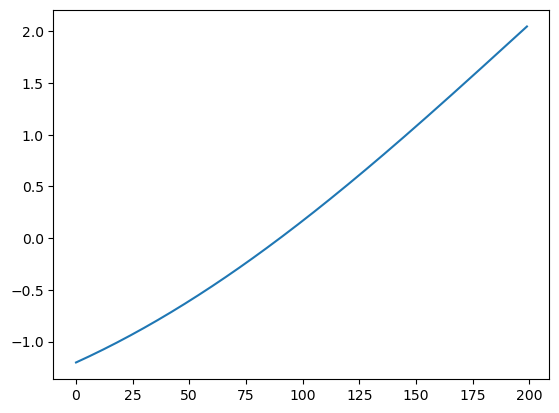

0.009999999999999787


In [170]:
dydx1 = np.diff(y)/np.diff(x)

plt.plot(x[:-1],dydx1)
plt.show()

print((dydx1[1]-dydx1[0])/(x[1]-x[0]))

In [276]:
dist=0
for i in range(len(dydx1)-1):
    dist+=np.sqrt(((x[i+1]-x[i])**2)+((y[i+1]-y[i])**2))
dist+=np.sqrt(((x[-1]-x[-2])**2)+((y[-1]-y[-2])**2))
print(dist)

206.15830232606322


5806


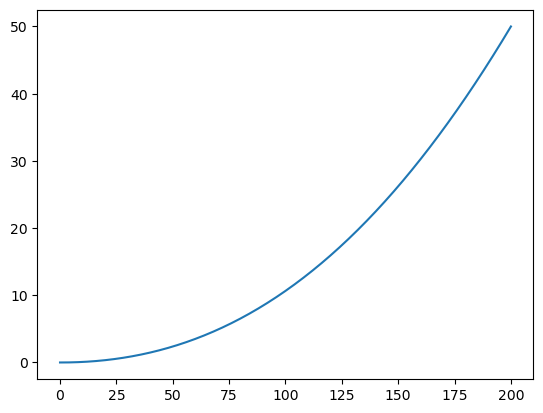

In [205]:
w0=10
T0=1000
lB=200
hB=50

x,y,k = shooter(0,lB,0,hB,1)
dydx1 = np.diff(y)/np.diff(x)

for i in range(10000):
    if dydx1[0] > 0:
        print(T0)
        break
    else:
        T0+=1
        x,y,k = shooter(0,lB,0,hB,1)
        dydx1 = np.diff(y)/np.diff(x)

T0=T0
x,y,k = shooter(0,lB,0,hB,1)
plt.plot(x,y)
plt.show()

167098
201


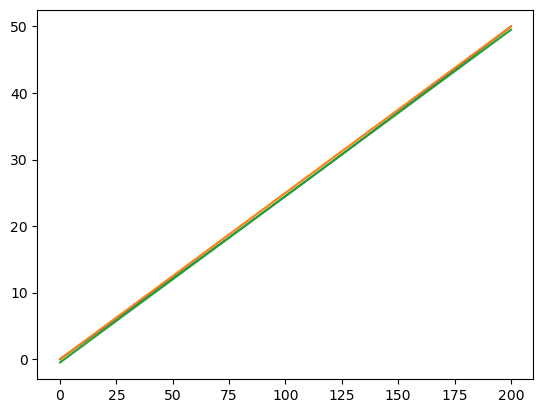

In [275]:
w0=10
T0=1000
lB=200
hB=50

x,y,k = shooter(0,lB,0,hB,1)
slope=((y[-1]-y[0])/(x[-1]-x[0]))
ys=[]
ys5=[]
for i in x:
    ys.append(i*slope)
    ys5.append((i*slope)-.5)

for x in range(10000):
    cnt=0
    for i in range(len(y)):
        if abs(y[i]-(i*slope)) < .5:
            cnt+=1
        else:
            T0+=1
    x,y,k = shooter(0,lB,0,hB,1)

print(T0)
print(cnt)
T0=T0
x,y,k = shooter(0,lB,0,hB,1)
plt.plot(x,y)
plt.plot(x,ys)
plt.plot(x,ys5)
plt.show()

# problem 3

12-lennard-jones potential

a) define LJ(r)

In [37]:
def LJ(r):
    return (4*eps)*(((sig/r)**12)-((sig/r)**6))

b) def U(p1,p2,p3) that calculates total potential energy between 3 identical particles confined to x-y plane. here p1=(x1,y1), p2=(x2,y2), p3=(x3,y3) represent the coords or particles 1,2,3. (hint: calc the pairwise energies btwn each pair or particles in the system and sum them.)